# Libraries

In [3]:
!pip install deep-translator
!pip install geopandas
!pip install geocoder
!pip install mapclassify
!pip install stargazer

     |████████████████████████████████| 97 kB 4.7 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.
     |████████████████████████████████| 1.0 MB 12.8 MB/s 
     |████████████████████████████████| 6.3 MB 55.5 MB/s 
     |████████████████████████████████| 15.4 MB 62.6 MB/s 
     |████████████████████████████████| 98 kB 4.8 MB/s 


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import OrdinalEncoder
from plotnine import *

import seaborn as sns
from collections import Counter

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from deep_translator import GoogleTranslator
import geocoder
import requests
from stargazer.stargazer import Stargazer

# Kamatz project

**Research question. 
Name the topic & which questions you aim to answer (1-2 paragraphs).**

We are going to analyze the determinants of pricing in Kamatz. We build a regression model using the following features:
*  years of experience
*  number of skills
*  number of recommendations
*  ethnicity (arab, white, asian, black, hispanic)
*  gender (male, female)


We aim to understand, through the analysis of the regression model, what are the most important features determining the tariff of freelancers. 
Furthermore, the analysis aims to see if there are differences among the ethnicities so that maybe those who suffer from discrimination have incentives to provide more information. We also inspect discrimination between males and females.
Similarly, we study the determinant of ranking of Kamatz to analyze if the platform’s algorithm has discriminatory behaviors. 

We try to develop an algorithm, based on a similarity function, to answer the question "Are the freelancers' skills match with the searched job?". The aim is to understand the efficacy of Kamatz in showing the results and also to understand the quality of the freelancers and then the quality of a platform.




**Organizations of the code**
  * download data
  * data cleaning and data visualization
    * Data Description and Data Cleaning
    * Histograms of the features
    * Plotting maps about freelancers' location
    * Tarif per gender
    * Tarif per ethnicity
    * Tarif per gender and ethnicity
    * Tarif per job and ethnicity
    * Top25 skills in the whole platform 
    * Top10 skills for each different platform

When searching for a job, Kamatz shows us almost all freelancers, even if their skills do not match with the searched job. So, we try to figure out, how many freelancers are really suitable for a specific searched job analyzing their skills.
More details in the section:
  * Are their skills matching the searched tasks?

  * Regression on tariff
  * Regression on rank

## Download data

In [14]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')
df.head(5)

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,path_to_profile,skills_count,languages,isEducationListed,months_experience,num_experiences,searched_job,search_rank,fetched_at,region,sub-region,ethnicity,gender
0,Saker Kadri,bc5mh7ud4sc8,"Tunis, Tunisie",Administrateur bases de données,3 à 7 ans d'expérience,"['Microsoft Excel', 'Microsoft PowerPoint', 'S...",5,20€,0,/fr/freelance/saker-kadri,5,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,1,2022-01-05 20:05:10.382447,Africa,Northern Africa,asian,male
1,Joffrey Michaïe,xj3yn4yg0es7,"Paris, France",Consultant Bases de données,plus de 7 ans d'expérience,"['MySQL', 'MariaDB', 'Galera', 'Percona', 'Lin...",6,2400€,0,/fr/freelance/joffrey-michaie,6,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,2,2022-01-05 20:05:10.866183,Europe,Western Europe,white,male
2,MARTER,gv2bs7iy5gy2,"Bischheim, France",SECRÉTAIRE ASSISTANT - ADMINISTRATEUR WEB,3 à 7 ans d'expérience,"['accueil téléphonique', 'Word', 'Excel', 'Sec...",17,200€,0,/fr/freelance/marter,17,"[{'level': 2, 'lang': 'en'}]",True,0,0,Administrateur Base de Données,3,2022-01-05 20:05:11.303683,Europe,Western Europe,white,male
3,MAALAOUI Chedia,tj6fi0qk3gc2,"Herblay, France",Gestionnaire administrative (gestion de données),plus de 7 ans d'expérience,"['Gestion administrative', 'Gestion commercial...",7,290€,0,/fr/freelance/maalaoui-chedia,7,[],False,0,0,Administrateur Base de Données,4,2022-01-05 20:05:11.881838,Europe,Western Europe,asian,female
4,Ella Kpozé,ti0qm8uu3yz2,"Paris, France",Analyse de données & Etudes marketing,plus de 7 ans d'expérience,"['Analyse de données', 'Étude Marketing', 'Ges...",21,550€,0,/fr/freelance/ella-kpoze,21,"[{'level': 5, 'lang': 'en'}]",True,233,5,Administrateur Base de Données,5,2022-01-05 20:05:12.397737,Europe,Western Europe,white,female


We will drop some columns that are not useful for our purpose such as: path_to_profile and fetched_at.

In [15]:
df.drop(columns=["path_to_profile","skills_count","fetched_at"], inplace=True)
df.head(2)

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,searched_job,search_rank,region,sub-region,ethnicity,gender
0,Saker Kadri,bc5mh7ud4sc8,"Tunis, Tunisie",Administrateur bases de données,3 à 7 ans d'expérience,"['Microsoft Excel', 'Microsoft PowerPoint', 'S...",5,20€,0,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,1,Africa,Northern Africa,asian,male
1,Joffrey Michaïe,xj3yn4yg0es7,"Paris, France",Consultant Bases de données,plus de 7 ans d'expérience,"['MySQL', 'MariaDB', 'Galera', 'Percona', 'Lin...",6,2400€,0,"[{'level': 5, 'lang': 'en'}, {'level': 5, 'lan...",False,0,0,Administrateur Base de Données,2,Europe,Western Europe,white,male


## Data cleaning and data visualization

### Data Description and data cleaning

In [16]:
df.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,search_rank,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2281,2279,2279
Assistant Administratif,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371
Assistant Personnel,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
Brand Designer,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,948,948
Brand Manager,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
Business Analyst,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481,481
Chef de project Digital,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2318,2316,2316
Community Manager,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525,525
Concepteur-Rédacteur,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85


In [17]:
df.shape

(28732, 19)

In [18]:
dft = df.drop_duplicates(subset="id")
dft.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,languages,isEducationListed,months_experience,num_experiences,search_rank,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2266,2264,2264
Assistant Administratif,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Assistant Personnel,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brand Designer,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Brand Manager,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Business Analyst,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Chef de project Digital,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Concepteur-Rédacteur,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Consultant Stratégie Marketing,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


**Comment**

Apparently, there are many freelancers (28 732) but when we remove duplicates we only have 2449. The problem is the platform algorithm itself. 

**Problem**

When searching for a job, Kamatz displays firstly the freelancers that are suitable for that job, then, almost all the remaining freelancers (even if the title and skills do not match with the searched job).

**Solution**

To balance the dataset and to obtain more reliable data we take the first 150 freelancers for each searched job. 

In [19]:
df = pd.read_csv(url, sep = ',')
d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 150 results for each searched_job """
  d[k] = pd.DataFrame(v[0:150])
  
dfm = pd.concat(d.values(), ignore_index=True)

dfm.drop_duplicates(subset="id",inplace=True)
print(dfm.shape)

(2004, 22)


In [20]:
dfm.groupby(by=["searched_job"]).count()

,name,id,location,title,experience,skills,nb_skills,tarif,recommendations,path_to_profile,skills_count,languages,isEducationListed,months_experience,num_experiences,search_rank,fetched_at,region,sub-region,ethnicity,gender
searched_job,,,,,,,,,,,,,,,,,,,,,
Administrateur Base de Données,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Assistant Administratif,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
Assistant Personnel,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
Brand Designer,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,148,148
Brand Manager,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
Business Analyst,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
Chef de project Digital,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
Community Manager,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Concepteur-Rédacteur,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67


**Comment** 

In this way, we obtain a less number of freelancers. 2004 against 2449 of the platform but we gain on quality of data. We work with this version of the dataset for the visualization part.

In [21]:
dfm.describe()

,nb_skills,recommendations,skills_count,months_experience,num_experiences,search_rank
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,13.303892,0.055389,13.303892,47.640719,1.996008,73.952595
std,10.146750,0.333555,10.146750,82.964252,2.937523,43.138843
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,7.000000,0.000000,7.000000,0.000000,0.000000,37.000000
50%,10.000000,0.000000,10.000000,7.000000,1.000000,72.000000
75%,17.000000,0.000000,17.000000,65.000000,3.000000,111.000000
max,83.000000,5.000000,83.000000,857.000000,47.000000,150.000000


In [22]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 5339
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2004 non-null   object
 1   id                 2004 non-null   object
 2   location           2004 non-null   object
 3   title              2004 non-null   object
 4   experience         2004 non-null   object
 5   skills             2004 non-null   object
 6   nb_skills          2004 non-null   int64 
 7   tarif              2004 non-null   object
 8   recommendations    2004 non-null   int64 
 9   path_to_profile    2004 non-null   object
 10  skills_count       2004 non-null   int64 
 11  languages          2004 non-null   object
 12  isEducationListed  2004 non-null   bool  
 13  months_experience  2004 non-null   int64 
 14  num_experiences    2004 non-null   int64 
 15  searched_job       2004 non-null   object
 16  search_rank        2004 non-null   int64 


Ethnicity and gender have some null values, we remove them.

In [23]:
dfm.dropna(inplace=True)
print(dfm.shape)

(2002, 22)


### Histogram of the features

In [ ]:
dfm.recommendations.hist(bins="auto");
plt.title("Recommendations histogram")
plt.xlabel("Number of recommendations")

In [ ]:
Counter(dfm.recommendations)

**Comment**

Almost everyone has 0 recommendations, only 46 have 1 recommendation and very few have more than 1. Since the platform is new is reasonable that lots of freelancers have no recommendations.

In [ ]:
dfm.months_experience.hist(bins="auto");

In [ ]:
dfm.experience.hist(bins="auto");
Counter(dfm.experience)

**Comment** 

Here data seems to be contradictory: there are more than 1000 freelancers with 0 months of experience and only 459 with '1 à 2 ans d'expérience'. The problem is that months of experience is a feature calculated (by us) summing all the duration of the job experiences that each freelancer puts, if he wants, in his profile. While the other feature is mandatory and is requested by the platform during the subscription. 

Since is not mandatory to put all job experiences, some freelancers don't care about that, even if they have many years of experience. As result, these freelancers have no months of experience. 
In conclusion, we decide to not use this feature since is not reliable.  

In [ ]:
dfm.region.hist(bins="auto")
Counter(dfm.region)

#try piechart

**Comment**

Since it's a french platform it is reasonable that almost everyone comes from Europe, only a few are African. 

In [ ]:
dfm.ethnicity.hist(bins="auto",figsize=(15,7));

**Comment** 

We do not have too many records for the ethnicity "pacific islander" and "native american". We remove them since it's not a sufficient representative sample.

In [ ]:
dfm.drop(dfm[dfm.ethnicity == "pacific islander"].index, inplace=True)
dfm.drop(dfm[dfm.ethnicity == "native american"].index, inplace=True)
dfm.ethnicity.hist(bins="auto",figsize=(15,7));

In [ ]:
dfm["gender"].hist(bins="auto",figsize=(15,7));

### Plotting maps about freelancers

In [ ]:
#dropping duplicates 
df_unique = df.drop_duplicates(subset="id").dropna()

In [ ]:
#creating a new column country extracting it from location
df_unique["country"] = df_unique["location"].apply(lambda x : x.split(",")[1])
df_location = pd.DataFrame({'count' : df_unique.groupby(by="country").name.count()}).reset_index()

#translating countries' name because they were in French
translator = GoogleTranslator(source='fr', target='en')
df_location.country = df_location.country.apply(lambda x : translator.translate(x))

#left join between the world dataset and  
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_location_world = df_world.merge(df_location, how="left", left_on=['name'], right_on=['country'])

In [ ]:
#plotting distribution in the whole world using geopandas and matplotlib
fig, ax = plt.subplots(1, 1, figsize=(25, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
ax.set_title("Distribution of Kamatz freelancers in the whole world")
df_location_world.plot(column="count", ax=ax, cax=cax, cmap='OrRd', legend=True, legend_kwds={"label": "Number of freelancer"}, missing_kwds={'color': 'lightgrey'})

To better visualize where are the freelancers that are using the platform we plot, exploiting geopandas library, the map of the world with the distribution of users per country. Since, it's a new French platform, we can see that most of the users come from there or from francophone countries.

In [ ]:
#distribution in France
#selecting only the location that are in France and grouping by each city to count the frequence of freelancer in each of them
df["country"] = df["location"].apply(lambda x : x.split(", ")[1])
df_location = pd.DataFrame({'count' : df[df["country"]=="France"].groupby(by="location").name.count()}).reset_index()

#using geocoder, we get the latitude and longitude of cities and we create new fields for them
df_location["latLong"] = df_location["location"].apply(lambda x : geocoder.arcgis(x).latlng)
df_location["lat"] = df_location["latLong"].apply(lambda x: x[0])
df_location["lon"] = df_location["latLong"].apply(lambda x: x[1])

#with geopandas we get the GeoDataFrame using lat and long
df_location_gpd = gpd.GeoDataFrame(df_location, geometry=gpd.points_from_xy(df_location["lon"], df_location["lat"]))

In [ ]:
##downloading a json Europe map 
#url = "https://github.com/leakyMirror/map-of-europe/raw/master/GeoJSON/europe.geojson"
#r = requests.get(url, allow_redirects=True)
#open("europe.geojson.txt", "wb").write(r.content)
#
#europe_map = gpd.read_file("europe.geojson.txt")
#fig, ax = plt.subplots(figsize=(10, 10))
#europe_map[europe_map["NAME"] == "France"].plot(ax=ax, zorder=1, color="lightblue")
#
##excluding those in the Martinican because of problem of visualization
#df_location_gpd = df_location_gpd[df_location_gpd.lat>18]
#points = df_location_gpd.sort_values(by="count").plot(ax=ax, zorder=2, column="count", scheme="NaturalBreaks", legend=True)
#ax.set_axis_off()
#ax.set_title("Freelancer in France", fontdict={"fontsize":20})
#
## Final adjustments
#fig.tight_layout() #tidy up the figure 

As we were expecting, plotting the distribution of Kamatz freelancers in France, the greatest concentration is in Paris and in general in the Île-de-France region. We can also notice that we have high concentration around Lyon and in the south east coast.

### Tarif per gender

Since tarif is a string of the following format: x€, we convert into a number using the function getSalary().

In [ ]:
def getSalary(x):
  euro = x.find("€")
  return x[:euro]

dfm.tarif = dfm.tarif.apply(getSalary)
dfm.tarif = dfm.tarif.astype(int)

In [ ]:
df = dfm
gender = []
tarif_mean = []
for k,v in df.groupby(by=["gender"]):
  gender.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"gender": gender,
        "tarif_mean": tarif_mean
        }
df1 = pd.DataFrame(data)
df1.head()

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="gender", y="tarif_mean", hue="gender", data=df1)

**Comment**

From this graph, we can see that females, on average, earn a little less than males. 

### Tarif per ethnicity

In [ ]:
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["ethnicity"]):
  ethnicity.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)
df2.head()


sns.set(rc={'figure.figsize':(20,9)})
ax = sns.barplot(x="ethnicity", y="tarif_mean", hue="ethnicity", data=df2)

In [ ]:
region = []
tarif_mean = []
for k,v in df.groupby(by=["region"]):
  region.append(k)
  tarif_mean.append(v.tarif.mean())

data = {"region": region,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)
df2.head()


sns.set(rc={'figure.figsize':(25,9)})
ax = sns.barplot(x="region", y="tarif_mean", hue="region", data=df2)

**Comment**

We plot, for each ethnicity, the average tariff per day. Looking at this graph we can say that Hispanics and Asian earns less than the others. 

The goal is to understand why and the differences between their profiles and the other, so they can be motivated to complete their profile to provide more accurate information.

### Tarif per gender and ethnicity

In [ ]:
gender = []
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["gender","ethnicity"]):
  gender.append(list(k)[0])
  ethnicity.append(list(k)[1])
  tarif_mean.append(v.tarif.mean())

data = {"gender": gender,
        "ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df1 = pd.DataFrame(data)
df1.head()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="ethnicity", y="tarif_mean", hue="gender", data=df1)

**Comment** 

We plot, for each ethnicity, the different tariffs per day according to gender. Again, we can see that females, on average, earn a little less than males, but this difference varies according to ethnicity.

### Tarif per job and ethnicity

In [ ]:
job = []
ethnicity = []
tarif_mean = []
for k,v in df.groupby(by=["searched_job","ethnicity"]):
  job.append(list(k)[0])
  ethnicity.append(list(k)[1])
  tarif_mean.append(v.tarif.mean())

data = {"job": job,
        "ethnicity": ethnicity,
        "tarif_mean": tarif_mean
        }
df2 = pd.DataFrame(data)

sns.set(rc={'figure.figsize':(22,8.27)})
ax = sns.barplot(x="job", y="tarif_mean", hue="ethnicity", data=df2[:34])

In [ ]:
ax = sns.barplot(x="job", y="tarif_mean", hue="ethnicity", data=df2[35:64])

### Top25 skills in the whole platform

In [ ]:
a = dfm.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))

flat_list = [item for sublist in a for item in sublist]
x = Counter(flat_list)
sorted(x)
skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
top25_skills = skills_freq_list[:25]

dfs = pd.DataFrame(top25_skills)
dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
ax = sns.barplot(x="frequence", y="skills", data=dfs)

### Top10 skills for each different job

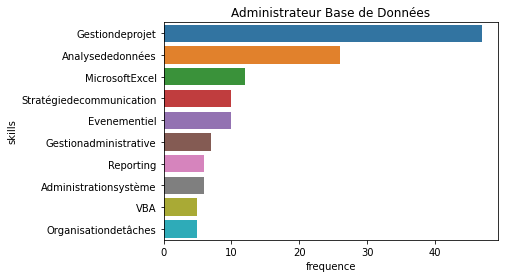

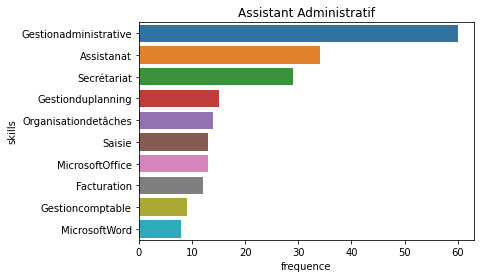

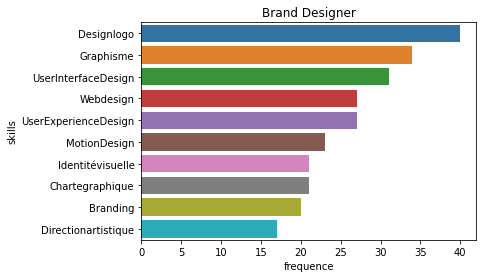

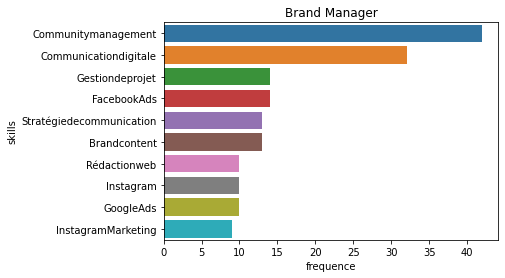

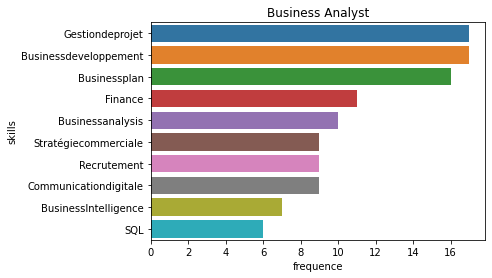

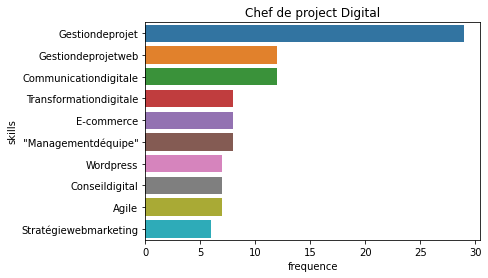

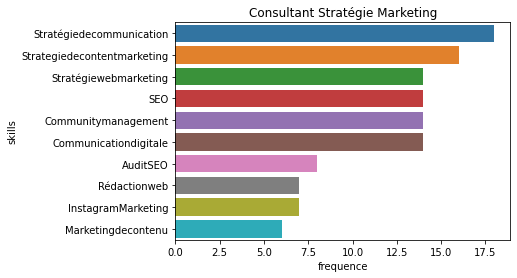

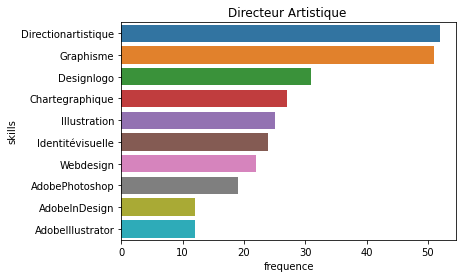

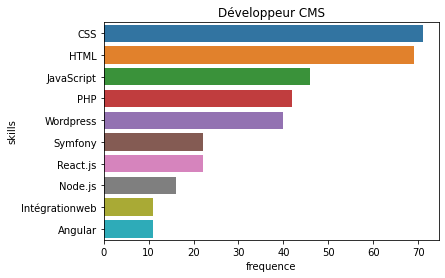

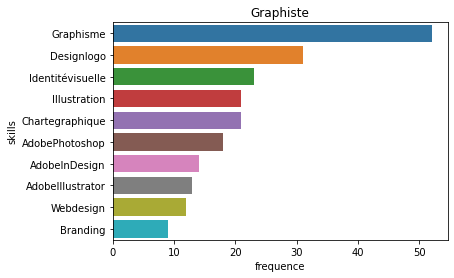

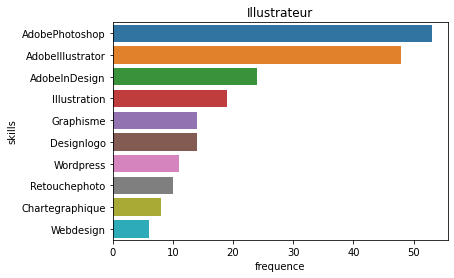

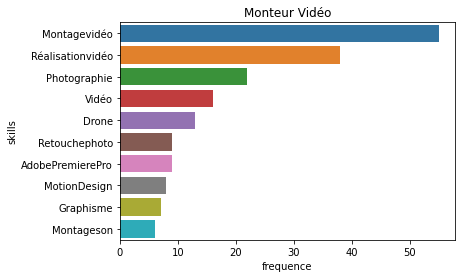

In [24]:
i = 0
for k, v in dfm.groupby(by=["searched_job"]):
  a = v.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))
  flat_list = [item for sublist in a for item in sublist]
  x = Counter(flat_list)
  sorted(x)
  skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
  top10_skills = skills_freq_list[:10]
  dfs = pd.DataFrame(top10_skills)
  dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
  if dfs.frequence.mean() > 10:
    plt.figure(i)
    plt.title(k)
    ax = sns.barplot(x="frequence", y="skills", data=dfs)
  i = i + 1

**Comment** 

For each searched job we plot the top 10 skills. Since Kamatz in a new platform, for some jobs, there are only few freelancers and so the visualization is not meaning ful. We chose only searched job with a consistent number of freelancers. To see the method see the *if condition* in the code above.

## Are their skills matching the searched tasks?

**How to use the code**

Insert in the string *job* the job that you want to analyze. In our example we insert *Administrateur Base de Données*.

Then a graph shows what are the top 20 skills for that job.

Then, for each freelancer, we calculate if his skills contain at least 30% of the top 20 skills for that job: it means that the searched job matches his skills and so the freelancer is suitable for doing that work. Otherwise the freelancer is not considered. 

We chose the threshold of 30% because higher values lead to very few results.

In [ ]:
""" Here is a list with all the jobs """
dfm.searched_job.unique()

In [ ]:
#@title
i = 0
job = "Administrateur Base de Données"
for k, v in dfm.groupby(by=["searched_job"]):
  if k == job:
    a = v.skills.apply(lambda x: x[2:-2].replace("'","").replace(" ","").split(","))
    flat_list = [item for sublist in a for item in sublist]
    x = Counter(flat_list)
    sorted(x)
    skills_freq_list = [(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]
    top20_skills = skills_freq_list[:20]
    dfs = pd.DataFrame(top20_skills)
    dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
    plt.figure(i)
    plt.title(k)
    ax = sns.barplot(x="frequence", y="skills", data=dfs)
  i = i + 1

In [ ]:
#@title
top20_skills
dfs = pd.DataFrame(top20_skills) 
dfs = dfs.rename(columns={0: "skills", 1: "frequence"})
top20_skills = list(dfs.skills)

def fromStrtoList(x):
    a = x[2:-2].replace("'","").replace(" ","").split(",")
    return a

def myfunc(x):
  list_skills = fromStrtoList(x)
  tot_skills = len(list_skills)
  count_top_skill = 0
  for skill in list_skills:
    if skill in top20_skills:
      count_top_skill = count_top_skill + 1
  if count_top_skill/tot_skills > 0.3:
    return True
  return False

number_freelancer_shown_by_platform = dfm[ dfm["searched_job"] == 'Administrateur Base de Données'].shape[0]
dfm_administrateur_base_des_donnes = dfm[ dfm["searched_job"] == 'Administrateur Base de Données']
number_freelancer_filter =  dfm_administrateur_base_des_donnes[dfm_administrateur_base_des_donnes.skills.apply(myfunc)].shape[0]
print(f"The total number of freelancers appear for {job} is {number_freelancer_shown_by_platform}, the number of freelancers that has at least {0.3*100}% of skills for that job is {number_freelancer_filter}")

**Comment**
to complete

## Different approach Regression 

### Regression tariff

We aim to analyze the determinants of pricing in Kamatz. We fit data into a Regression Model where the variables are the following:


*   **dependent variable**: 
  * *tariff*
*   **independent variables**:
  * *experience*: categorical variable
  * *nb_skills*: numerical variable
  * *recommendations*: numerical variable
  * *ethnicity*: categorical variable
  * *gender*: categorical variable


For the feature *experience* we use the Ordinal Encoder: 
  * 1 à 2 ans d'expérience: 1
  * 3 à 7 ans d'expérience: 2
  * plus de 7 ans d'expérience: 3 

For the other categorical variables `statsmodel` automatically generates a unique dummy for each level (-1).

**Which data do we use?**

For this model we consider all the data, we remove duplicates and fit all 2440 freelancers into the regression model.


#### Preprocess data

In [ ]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df_full = pd.read_csv(url, sep = ',')

In [ ]:
df_unique = df_full.drop_duplicates(subset="id").dropna().reset_index()
df_unique.drop(columns=["id","skills_count", "name", "path_to_profile", "fetched_at", "searched_job", "languages", "index", "location", "title", "skills", "months_experience", "search_rank"], inplace=True)

df_unique.tarif = df_unique.tarif.apply(lambda x : x[:x.find("€")])
df_unique.tarif = df_unique.tarif.astype("float")

""" outliers removal """
df_unique = df_unique[(df_unique["ethnicity"]!="native american") & (df_unique["ethnicity"]!="pacific islander")]

""" 
  ordinal encoder for the experience
"""
enc = OrdinalEncoder()
enc.fit(df_unique[["experience"]])
df_unique["experience"] = enc.transform(df_unique[["experience"]])
df_unique["experience"] = df_unique.experience.apply(lambda x: x+1)

print(f"The total number of freelancers of the platform is {df_unique.shape[0]}")

The total number of freelancers of the platform is 2440


#### Collinearity check
Collinearity is the situation in which two dependent varaibles are higly correlated with each other. Algebraically, this is a problem because the $X'X$ matrix becomes almost-non-invertible.

,experience,nb_skills,recommendations
experience,1.000000,0.049612,0.028863
nb_skills,0.049612,1.000000,0.163218
recommendations,0.028863,0.163218,1.000000


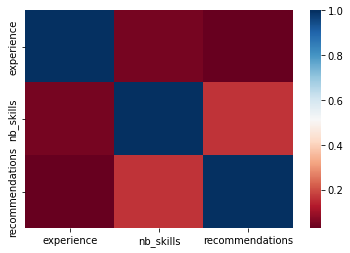

In [ ]:
import seaborn as sns
# calculate the correlation matrix
corr = df_unique[["experience", "nb_skills", "recommendations"]].corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

**Comment**

We can conclude there's no correlation between the variables.

#### General Model

the p-value of isEducationListed is 0.993, we can remove it from the model

In [ ]:
tarif_model1 = sm.OLS.from_formula('tarif ~ experience + nb_skills + recommendations  +  C(ethnicity, Treatment("white")) + gender ', df_unique).fit()
tarif_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tarif   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          2.56e-144
Time:                        15:50:53   Log-Likelihood:                -16183.
No. Observations:                2440   AIC:                         3.238e+04
Df Residuals:                    2431   BIC:                         3.244e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       49.1801     12.937      3.801      0.000      23.811      74.549
C(ethnicity, Treatment("white"))[T.arab]       -47.1535     18.045     -2.613      0.009     -82.540     -11.768
C(ethnicity, Treatment("white"))[T.asian]      -44.2470     11.077     -3.994      0.000     -65.969     -22.525
C(ethnicity, Treatment("white"))[T.black]        2.2817     13.499      0.169      0.866     -24.188      28.752
C(ethnicity, Treatment("white"))[T.hispanic]   -39.8660     12.984     -3.070      0.002     -65.326     -14.406
gender[T.male]                                  37.1968      7.613      4.886      0.000      22.268      52.125
experience                                     128.9026      4.929     26.149      0.000     119.236     138.569
nb_skills                                        1.6470      0.381      4.320      0.000       0.899       2.395
recommendations                                  4.9265     11.495      0.429      0.668     -17.615      27.468
==============================================================================
Omnibus:                      851.510   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6879.249
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      10.718   Cond. No.                         81.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_unique[df_unique["ethnicity"] == "arab"].tarif.mean(), df_unique[df_unique["ethnicity"] == "white"].tarif.mean()

(313.44642857142856, 368.3810758263124)

**Comment**

The reference group for ethnicity is *white*.

The reference group for gender is *female*.

**Analysis of the coefficients**

Analyzing the coefficients of the model we can see that, keeping fixed all other features, and, varying the experience of + 1 the increment in the dependent variable, so the tariff, is 128€. This result is reasonable because, more experience you have and more money you can request.

We do some hypothesis testing to verify the presence of ethnicity discrimination: 

1.   Null hypothesis : $\beta_{ethnicity_{black}} = 0$

The p-value is 0.866. This means that we (almost) never reject the null hypothesis. We can adfirm that the coefficient is equal to zero and so there's no differences between black people's tariff and white people's tariff.

This can be proved by plotting the distribution 

2. Null hypothesis : $\beta_{ethnicity_{asian}} = 0$

The p-value is 0. We always reject the null hypothesis. We can conclude that the coefficient is never equal to 0 and so there's a difference between white people's tariff and asian's people tariff. 

Finally, we can see that the p-value of recommendations is very high. This means that for the model the variable is not influencing at all our dependent variable. We attribuite it to the fact that most all of the freelancers has 0 recommendations. As we already said before, this is caused by the recent creation of the platform




In [ ]:
# df_unique[df_unique["ethnicity"] == "asian"].hist();

In [ ]:
# df_unique[df_unique["ethnicity"] == "black"].hist();

#### Model for selected searched job

In [ ]:
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')

df = df[(df["ethnicity"]!="native american") & (df["ethnicity"]!="pacific islander")]
df.drop(columns=["id","skills_count", "name", "path_to_profile", "fetched_at", "languages", "location", "title", "skills", "isEducationListed", "months_experience"], inplace=True)

"""
mapping tarif to an integer
"""
df.tarif = df.tarif.apply(lambda x : x[:x.find("€")])
df.tarif = df.tarif.astype("float")

""" 
  ordinal encoder for the experience
"""
enc = OrdinalEncoder()
enc.fit(df[["experience"]])
df["experience"] = enc.transform(df[["experience"]])
df["experience"] = df.experience.apply(lambda x: x+1)

In [ ]:
d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 200 results for each searched_job """
  d[k] = pd.DataFrame(v[0:200])
  
dfm = pd.concat(d.values(), ignore_index=True)

#selecting the top 5 jobs for tarif average to run the model only in these data
jobs = dfm.groupby(by="searched_job").mean().sort_values(["tarif"], ascending=False).index[:5]

In [ ]:
#loop over searched jobs()
models = []
for job in jobs:
  print("job:"+job)

  #selecting the first 250 results ordered by search rank
  data = df[df["searched_job"]==job].sort_values(["search_rank"]).iloc[:250]


  #model
  models.append(sm.OLS.from_formula('tarif ~ experience + nb_skills + recommendations +  C(ethnicity, Treatment("white")) + gender ', data).fit())

job:Expert Business Intelligence
job:Chef de project Digital
job:Data Scientist
job:Consultant en Organisation
job:Data Analyst


In [ ]:
stargazer_tab = Stargazer(models)
stargazer_tab.custom_columns(list(jobs), [1, 1, 1, 1, 1])
stargazer_tab

Shit p-values, to watch them run #models[i].summary() with i from 0 to 4

In [ ]:
models[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tarif   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     15.63
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.74e-18
Time:                        15:26:16   Log-Likelihood:                -1718.3
No. Observations:                 250   AIC:                             3455.
Df Residuals:                     241   BIC:                             3486.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       26.1729     53.821      0.486      0.627     -79.847     132.193
C(ethnicity, Treatment("white"))[T.arab]         9.3963     57.147      0.164      0.870    -103.175     121.968
C(ethnicity, Treatment("white"))[T.asian]      -70.2898     43.678     -1.609      0.109    -156.329      15.749
C(ethnicity, Treatment("white"))[T.black]      -54.2089     51.553     -1.052      0.294    -155.762      47.344
C(ethnicity, Treatment("white"))[T.hispanic]  -120.5994     61.233     -1.970      0.050    -241.221       0.022
gender[T.male]                                  69.0905     32.705      2.113      0.036       4.666     133.515
experience                                     191.4457     19.925      9.608      0.000     152.197     230.695
nb_skills                                        0.3036      1.311      0.232      0.817      -2.278       2.886
recommendations                                -21.9195     86.224     -0.254      0.800    -191.768     147.929
==============================================================================
Omnibus:                      124.617   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1430.825
Skew:                           1.664   Prob(JB):                    2.00e-311
Kurtosis:                      14.238   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Results analysis

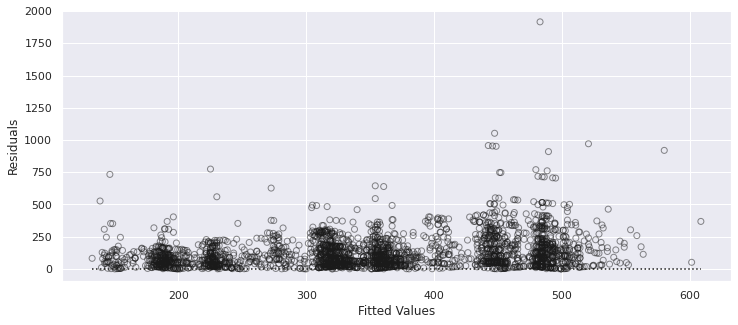

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 

# Compute fitted values and residuals
y_hat = tarif_model1.predict(df_unique)
e = np.abs(df_unique["tarif"] - y_hat)

# Plot 
ax.scatter(x=y_hat, y=e, facecolors='None', edgecolors='k', alpha=.5)
ax.set_xlabel('Fitted Values'); ax.set_ylabel('Residuals');
ax.hlines(0,xmin=ax.xaxis.get_data_interval()[0],
           xmax=ax.xaxis.get_data_interval()[1], linestyles='dotted',color='k')

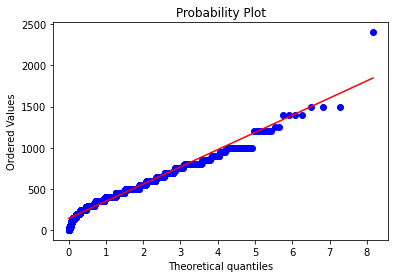

In [ ]:
import scipy.stats as st
st.probplot(df_unique["tarif"], dist=st.expon, plot=plt);

**Comment**

With the above probability plot we are checking if our dependent variable follow a normal distribution. As we can see, tarif doesn't follow a Normal distribution and it's also possible to see the presence of an outlier that has a value of 2400.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


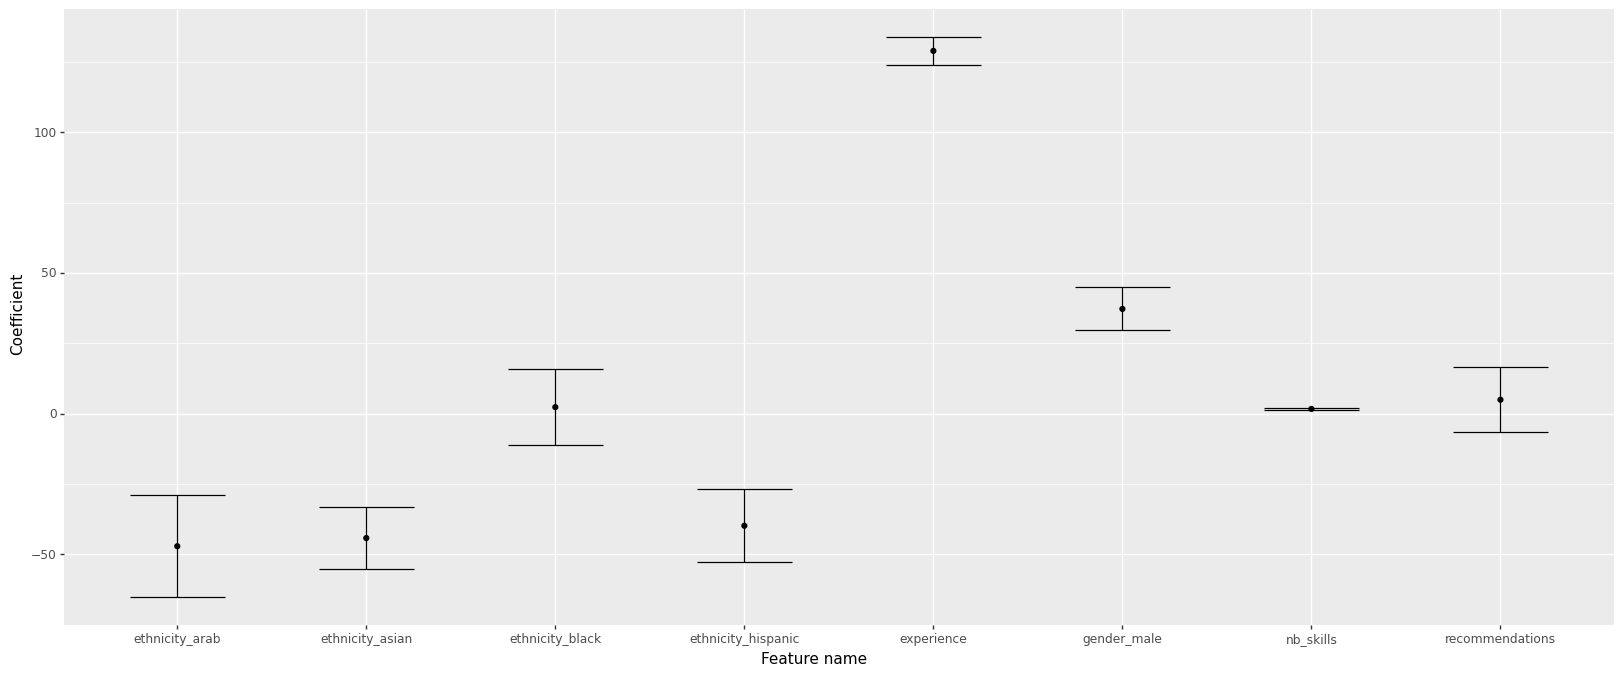

<ggplot: (8776076298245)>

In [ ]:
#@title
serie = pd.Series(data=[-47.153542, -44.246996, 2.281718, -39.866043, 37.196780, 128.902629, 1.647009, 4.926542], index = ["ethnicity_arab", 
                                                                                                                   "ethnicity_asian", 
                                                                                                                   "ethnicity_black",
                                                                                                                   "ethnicity_hispanic",
                                                                                                                   "gender_male",
                                                                                                                   "experience",
                                                                                                                   "nb_skills",
                                                                                                                   "recommendations"])
bse = pd.Series(data=[18.045423, 11.077280, 13.498640, 12.983752, 7.612991, 4.929459, 0.381257, 11.495440], index = ["ethnicity_arab", 
                                                                                                                   "ethnicity_asian", 
                                                                                                                   "ethnicity_black",
                                                                                                                   "ethnicity_hispanic",
                                                                                                                   "gender_male",
                                                                                                                   "experience",
                                                                                                                   "nb_skills",
                                                                                                                   "recommendations"])

# Put the results into a dataframe with Name, Coefficient, Error
res_df = (
    pd.concat([serie, bse], axis=1)
    .reset_index()
    .rename(columns={"index": "Feature name", 0: "Coefficient", 1: "Error"})
)
# Plot the coefficient values and their errors
(
    ggplot(res_df)
    + geom_point(aes("Feature name", "Coefficient"))
    + geom_errorbar(aes(x="Feature name", ymin="Coefficient-Error", ymax="Coefficient+Error"))
    + theme(figure_size=(20, 8)) 
)

### Regression on rank

we build a regression model for each searched job that has more than 2000 results

In [ ]:
#creating new variable with yes if the freelancer has listed his experience no otherwise
df_full["ExperienceListed"] = df_full["months_experience"].apply(lambda x : "yes" if x>0 else "no")

In [ ]:
jobs = ["Administrateur Base de Données", "Chef de project Digital", "Chef de project Digital", "Développeur Web Back-end", "Développeur Web Front-end"]

df_jobs = df_full[(df_full["searched_job"] == jobs[0]) | (df_full["searched_job"] == jobs[1]) | (df_full["searched_job"] == jobs[2]) | (df_full["searched_job"] == jobs[3]) | (df_full["searched_job"] == jobs[4])]

In [ ]:
#removing columns that we won't use during the regression part
df_jobs = df_jobs.drop(columns=["name", "id", "location", "title", "skills", "path_to_profile", "languages", "months_experience", "fetched_at", "sub-region"])
df_jobs["search_rank"] = df_jobs.search_rank.astype("int")
df_jobs["tarif"] = (df_jobs.tarif.apply(lambda x : x[:x.find("€")])).astype("int")

In [ ]:
""" 
  ordinal encoder for the experience
    1 à 2 ans d'expérience: 1
    3 à 7 ans d'expérience: 2
    plus de 7 ans d'expérience: 3
"""
enc = OrdinalEncoder()
enc.fit(df_jobs[["experience"]])
df_jobs["experience"] = enc.transform(df_jobs[["experience"]])
df_jobs["experience"] = df_jobs.experience.apply(lambda x: x+1)

In [ ]:
#loop over searched jobs(>2000 results)
for job, values in df_jobs.groupby(by="searched_job"):
  print("job:"+job)
  values = values.drop_duplicates()
  values = values.sort_values(by="search_rank").iloc[:100]
  rank = sm.OLS.from_formula('search_rank ~ experience + nb_skills + tarif + region+ gender + isEducationListed + ExperienceListed', values).fit()
  print(rank.summary())


job:Administrateur Base de Données
                            OLS Regression Results                            
Dep. Variable:            search_rank   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.990
Date:                Sun, 16 Jan 2022   Prob (F-statistic):             0.0648
Time:                        22:18:05   Log-Likelihood:                -471.11
No. Observations:                 100   AIC:                             958.2
Df Residuals:                      92   BIC:                             979.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

## Analysis on rank

Implementing a regression algorithm for the rank analysis would have been not too adequate because the dependent variable *search_rank* would have been an ordinal feature and not a continous one.

So, we decided to analyse visually the first top results of different *searched_job*. As already said before, the problem of the algorithm of search of Kamatz is that it includes almost every freelancer in each search query. So, first of all, we compute the tarif mean on the first 150 freelancers for each searched job and we select the top 5 jobs for tarif mean.

Then, for each of the selected jobs, we plotted the histograms for the variables in which we were more interested using only the first 20 result of each searched_job. We did that to understand if, who stay on the top of search have some particulare feature on which the algorithm of rank is based.



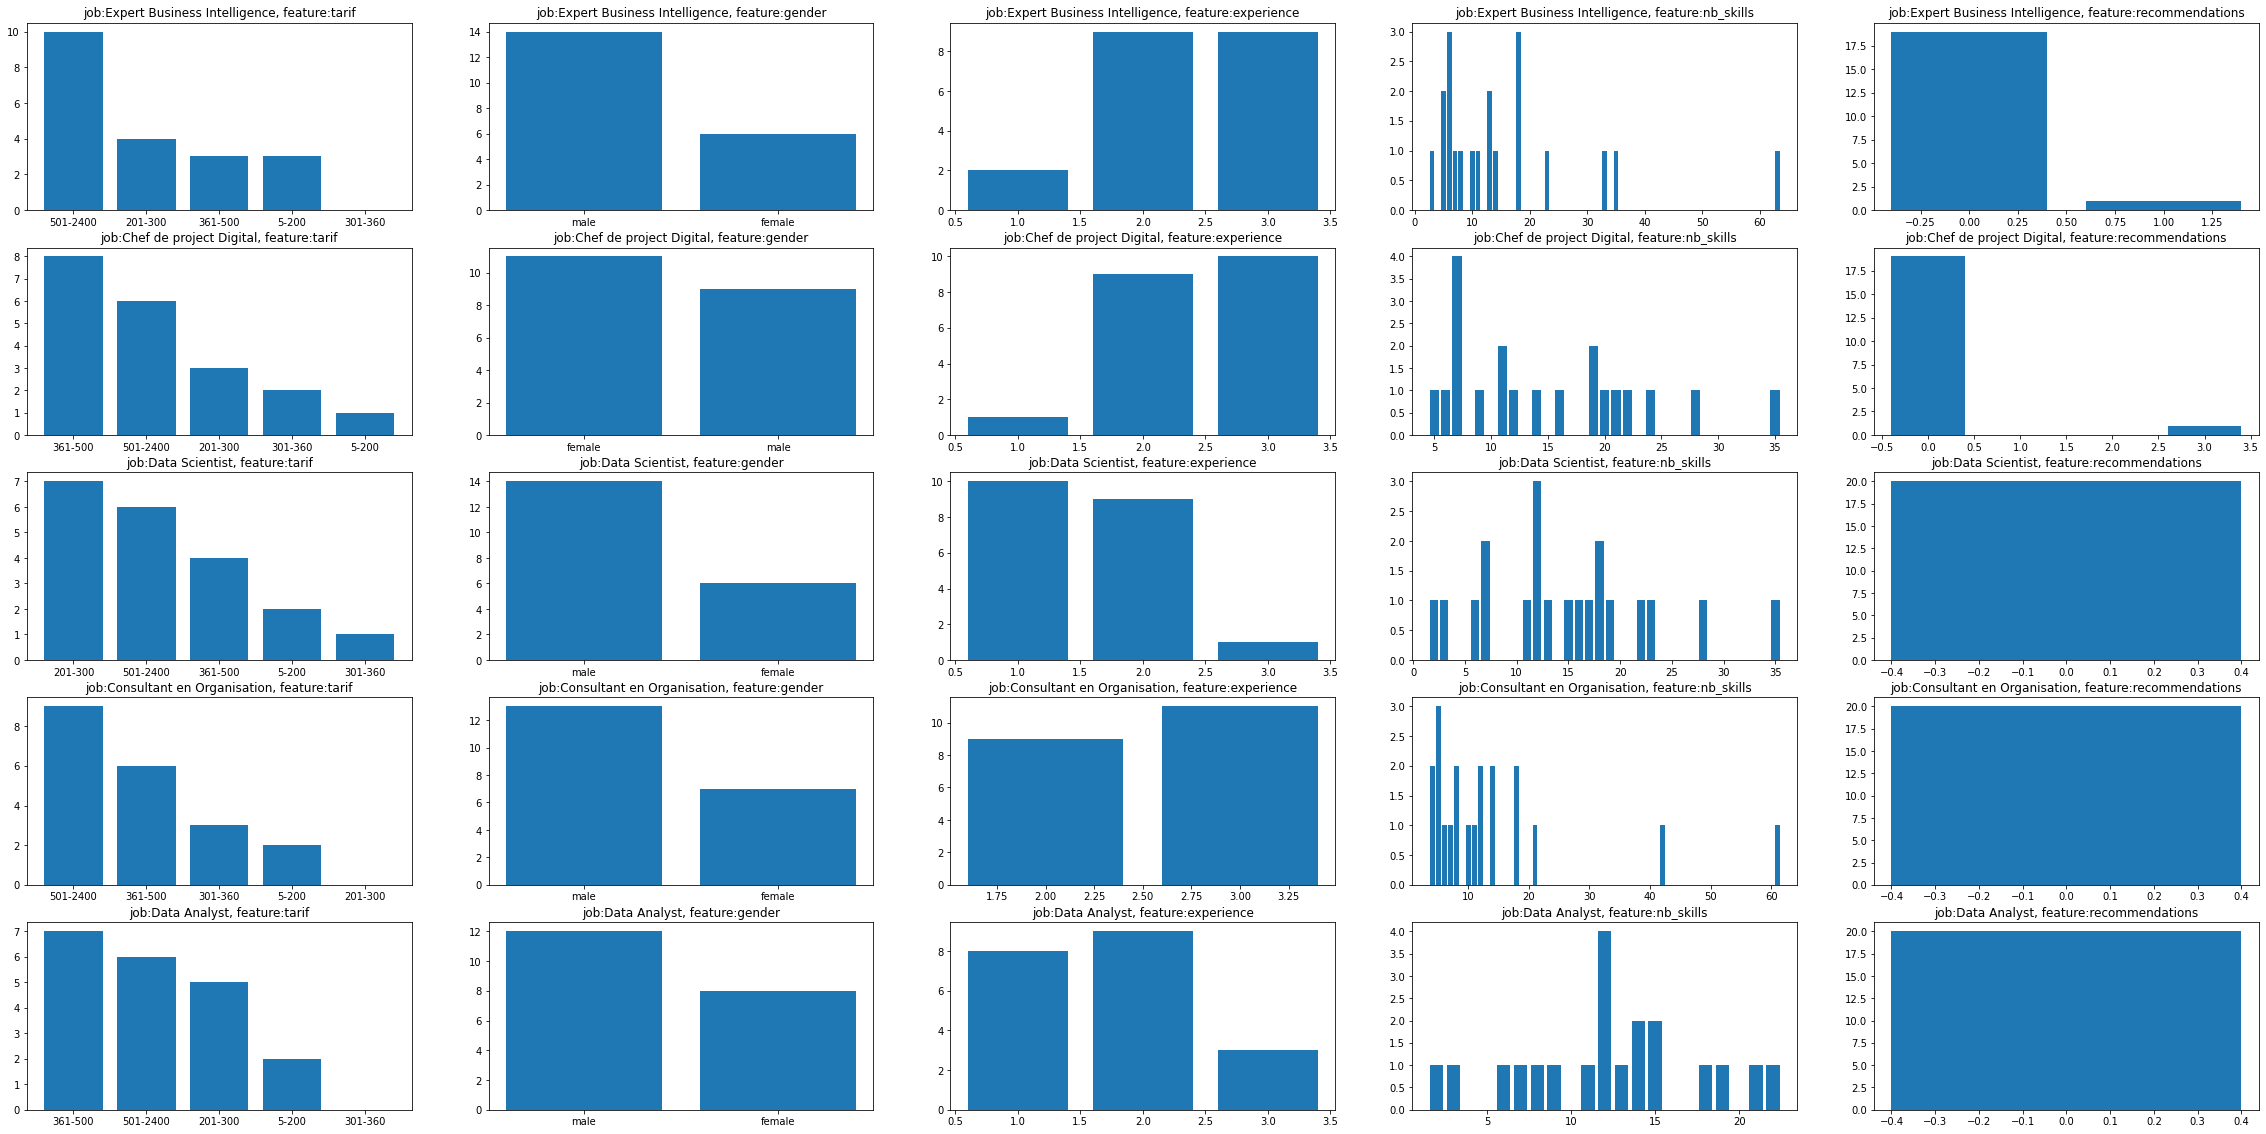

In [86]:
#downloading the dataset
url = 'https://raw.githubusercontent.com/RiccardoPrestigiacomo-99/analyse_kam/main/all.csv'
df = pd.read_csv(url, sep = ',')


"""
removing outliers

"""
df = df[(df["ethnicity"]!="native american") & (df["ethnicity"]!="pacific islander")]
df.drop(columns=["id","skills_count", "name", "path_to_profile", "fetched_at", "languages", "location", "title", "skills", "months_experience"], inplace=True)


"""
mapping tarif to an integer
"""
df.tarif = df.tarif.apply(lambda x : x[:x.find("€")])
df.tarif = df.tarif.astype("float")

""" 
  ordinal encoder for the experience
    1 à 2 ans d'expérience: 1
    3 à 7 ans d'expérience: 2
    plus de 7 ans d'expérience: 3
"""
enc = OrdinalEncoder()
enc.fit(df[["experience"]])
df["experience"] = enc.transform(df[["experience"]])
df["experience"] = df.experience.apply(lambda x: x+1)


"""
function for plotting
"""

d = {}
for k,v in df.groupby(by=["searched_job"]):
  """ we only keep the first 200 results for each searched_job """
  d[k] = pd.DataFrame(v[0:200])
  
dfm = pd.concat(d.values(), ignore_index=True)

#selecting the top 5 jobs for tarif average to run the model only in these data
jobs = dfm.groupby(by="searched_job").mean().sort_values(["tarif"], ascending=False).index[:5]
i = 0
j = 0

#here you can change the column to visualize
interesting_columns = ["tarif", "gender", "experience", "nb_skills", "recommendations"]

#categorization for feature tarif
df["tarif"] = pd.qcut(df["tarif"], q=5, labels=["5-200", "201-300", "301-360", "361-500", "501-2400"])

#plot
fig, ax = plt.subplots(len(jobs), len(interesting_columns), figsize=(40,20))
for job in jobs:
  for column in interesting_columns:
    data = df[df["searched_job"]==job].iloc[:20][column].value_counts().sort_values(["values"])
    ax[i,j].bar(x=list(data.index), height=list(data.values))
    ax[i,j].set_title("job:"+ job+", "+"feature:"+column)
    j += 1
  i += 1
  j = 0